# Chapter 7

In [37]:
import tensorflow as tf
from tensorflow.contrib import learn

### Linear Regression For the Boston Housing dataset

In [18]:
from sklearn import datasets, metrics, preprocessing
boston = datasets.load_boston()
x_data = preprocessing.StandardScaler().fit_transform(boston.data)
y_data = boston.target

In [39]:
len(x_data)

506

In [40]:
x_data[0]

array([-0.41771335,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
        0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
       -1.45900038,  0.44105193, -1.0755623 ])

#### Native TensorFlow

In [21]:
x = tf.placeholder(tf.float64,shape=(None,13))
y_true = tf.placeholder(tf.float64,shape=(None))

with tf.name_scope('inference') as scope:
    w = tf.Variable(tf.zeros([1,13],dtype=tf.float64,name='weights'))
    b = tf.Variable(0,dtype=tf.float64,name='bias')
    y_pred = tf.matmul(w,tf.transpose(x)) + b

with tf.name_scope('loss') as scope:
    loss = tf.reduce_mean(tf.square(y_true-y_pred))

with tf.name_scope('train') as scope:
    learning_rate = 0.1
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)      
    for step in range(100):
        sess.run(train,{x: x_data, y_true: y_data})
        if step%5 == 0:
            MSE = sess.run(loss,{x: x_data, y_true: y_data})
            print(MSE)
#     MSE = sess.run(loss,{x: x_data, y_true: y_data})
# print(MSE)

367.4707070808117
60.25358223547967
27.406118653496037
23.535199310162803
22.872687642163836
22.62527183348218
22.469475262579294
22.356079859410634
22.270364031382037
22.204341215174146
22.152702999966543
22.111738258856462
22.078804035219957
22.051994815379917
22.029921467295136
22.011560021534617
21.996146950957833
21.983106024846425
21.971996859594732
21.96247850249423


### contirb.learn

In [25]:
NUM_STEPS = 200
MINIBATCH_SIZE = 506

feature_columns = learn.infer_real_valued_columns_from_input(x_data)

# https://www.tensorflow.org/api_docs/python/tf/contrib/learn/LinearRegressor
# usually goes like this: LinearRegressor->fit->evaluate->predict
reg = learn.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=tf.train.GradientDescentOptimizer(
      learning_rate=0.1)
      )

reg.fit(x_data, boston.target, steps=NUM_STEPS, 
        batch_size=MINIBATCH_SIZE)

# why the evaluate step doesn't go up to 5? -> must insert batch_size too
# Stop conditions - we evaluate on the given input data until one of the following:
#   - If steps is provided, and steps batches of size batch_size are processed. 
#   - If input_fn is provided, and it raises an end-of-input exception (OutOfRangeError or StopIteration). 
#   - If x is provided, and all items in x have been processed.

# why do we need multiple steps of evaluate? how is loss calculated when there are multiple evaluation?

MSE = reg.evaluate(x_data, boston.target, steps=5, batch_size=100)

print(MSE)

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1298223c8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', 

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Starting evaluation at 2018-09-29-17:09:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/t1/0lnlbm194nz1xjnwvkq_sxfh0000gn/T/tmpvdlfembz/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/5]
INFO:tensorflow:Evaluation [2/5]
INFO:tensorflow:Evaluation [3

In [8]:
len(x_data)

506

### MNIST with contrib.learn DNN classifier

In [49]:
import sys
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
DATA_DIR = 'train' #if not 'win32' in sys.platform else "c:\\tmp\\data"
print(DATA_DIR)
## need internet connection
data = input_data.read_data_sets(DATA_DIR, one_hot=False)
x_data, y_data = data.train.images,data.train.labels.astype(np.int32)
x_test, y_test = data.test.images,data.test.labels.astype(np.int32)

train
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting train/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting train/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting train/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting train/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [50]:
NUM_STEPS = 2000
MINIBATCH_SIZE = 128

feature_columns = learn.infer_real_valued_columns_from_input(x_data)

dnn = learn.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[200],
    n_classes=10,
    optimizer=tf.train.ProximalAdagradOptimizer(
    learning_rate=0.2)
    )

dnn.fit(x=x_data,y=y_data, steps=NUM_STEPS,
        batch_size=MINIBATCH_SIZE)

test_acc = dnn.evaluate(x=x_test,y=y_test, steps=1)["accuracy"]
print('test accuracy: {}'.format(test_acc))

## Different hidden layers and see the accuracy results (50->97%, 200->97.6%)

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12a694160>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/t1/0lnlbm194nz1xjnwvkq_sxfh0000gn/T/tmpc3rgg5iz'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:

In [51]:
dnn = learn.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[200,100],
    n_classes=10,
    optimizer=tf.train.ProximalAdagradOptimizer(
    learning_rate=0.2)
    )

dnn.fit(x=x_data,y=y_data, steps=NUM_STEPS,
        batch_size=MINIBATCH_SIZE)

test_acc = dnn.evaluate(x=x_test,y=y_test, steps=1)["accuracy"]
print('test accuracy: {}'.format(test_acc))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12b28aef0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/t1/0lnlbm194nz1xjnwvkq_sxfh0000gn/T/tmp7rusyy2w'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/t1/0lnlbm194nz1xjnwvkq_sxfh000

### Predict and plot confusion matrix

In [52]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap,aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    plt.savefig('confusion_mat.png', bbox_inches='tight', format='png', dpi=300, pad_inches=0,transparent=True)

    
    plt.show()

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available

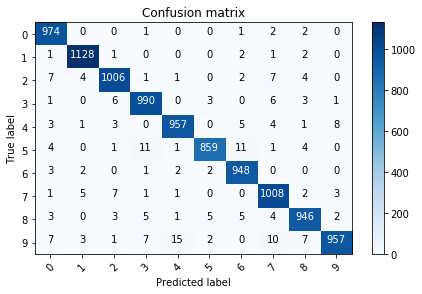

In [53]:
from sklearn.metrics import confusion_matrix
import itertools

y_pred = dnn.predict(x=x_test,as_iterable=False)
class_names = ['0','1','2','3','4','5','6','7','8','9']    
cnf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, class_names)

## TODO: try normalize
## By doing this, we may find which part the model needs improvement

### Generate example categorical data

In [58]:
import numpy as np
import pandas as pd
N = 10000

weight = np.random.randn(N)*5+70
spec_id = np.random.randint(0,3,N)
bias = [0.9,1,1.1]
height = np.array([weight[i]/100 + bias[b] for i,b in enumerate(spec_id)])
spec_name = ['Goblin','Human','ManBears']
spec = [spec_name[s] for s in spec_id]

In [59]:
spec

['ManBears',
 'Human',
 'ManBears',
 'ManBears',
 'ManBears',
 'ManBears',
 'ManBears',
 'ManBears',
 'ManBears',
 'Human',
 'Human',
 'ManBears',
 'ManBears',
 'Human',
 'Human',
 'Human',
 'ManBears',
 'Goblin',
 'Goblin',
 'Goblin',
 'ManBears',
 'Human',
 'ManBears',
 'ManBears',
 'Human',
 'ManBears',
 'Goblin',
 'Human',
 'ManBears',
 'Goblin',
 'Human',
 'Human',
 'Human',
 'Human',
 'ManBears',
 'Goblin',
 'Goblin',
 'Human',
 'ManBears',
 'Goblin',
 'ManBears',
 'Human',
 'Goblin',
 'ManBears',
 'ManBears',
 'ManBears',
 'Goblin',
 'ManBears',
 'Goblin',
 'ManBears',
 'ManBears',
 'Goblin',
 'Human',
 'Goblin',
 'Goblin',
 'Goblin',
 'ManBears',
 'ManBears',
 'ManBears',
 'Goblin',
 'ManBears',
 'ManBears',
 'Goblin',
 'ManBears',
 'Human',
 'Human',
 'Goblin',
 'Goblin',
 'ManBears',
 'ManBears',
 'ManBears',
 'Human',
 'Human',
 'Human',
 'ManBears',
 'Goblin',
 'ManBears',
 'Human',
 'ManBears',
 'Human',
 'Human',
 'Goblin',
 'Goblin',
 'ManBears',
 'Human',
 'Goblin',
 'H

In [60]:
height

array([1.78020573, 1.74322312, 1.82719332, ..., 1.75666088, 1.77520322,
       1.86901055])

### plot and create data frame

In [61]:
import matplotlib.pyplot as plt

N = 10000

weight = np.random.randn(N)*5+70
spec_id = np.random.randint(0,3,N)
bias = [0.9,1,1.1]
height = np.array([weight[i]/100 + bias[b] for i,b in enumerate(spec_id)])
spec_name = ['Goblin','Human','ManBears']
spec = [spec_name[s] for s in spec_id]

In [72]:
spec_id[:10]

array([1, 1, 0, 2, 0, 1, 0, 2, 1, 1])

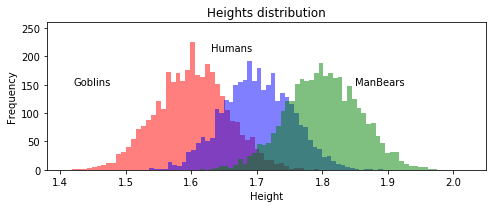

In [67]:
colors = ['r','b','g']
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
# figsize: tuple of integers, optional, default: None
f,axarr = plt.subplots(1,1,figsize = [7,3])
ax = axarr
# f,axarr = plt.subplots(1,2,figsize = [7,3])
# ax = axarr[0]
for ii in range(3):
    ax.hist(height[spec_id == ii],50,color=colors[ii],alpha=0.5)
    ax.set_xlabel('Height')
    ax.set_ylabel('Frequency')
    ax.set_title('Heights distribution')
# ax.legend(['Goblins','Humans','ManBears'],loc=2, shadow=True,prop={'size':6})
height = height + np.random.randn(N)*0.015
ax.text(1.42,150,'Goblins')
ax.text(1.63,210,'Humans')
ax.text(1.85,150,'ManBears')

ax.set_ylim([0,260])
ax.set_xlim([1.38,2.05])

df = pd.DataFrame({'Species':spec,'Weight':weight,'Height':height})

plt.tight_layout()
plt.savefig('test1.png', bbox_inches='tight', format='png', dpi=300)

plt.show()

In [74]:
df[0:10]

,Species,Weight,Height
0,Human,76.846554,1.738163
1,Human,75.993374,1.775000
2,Goblin,61.900292,1.503529
3,ManBears,67.817617,1.794363
4,Goblin,69.867824,1.607328
5,Human,67.726039,1.679998
6,Goblin,64.840026,1.517039
7,ManBears,65.552764,1.765116
8,Human,71.961985,1.702189
9,Human,65.572419,1.686988


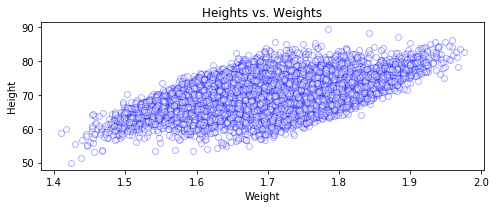

In [69]:
f, ax = plt.subplots(1,1,figsize = [7,3])
# ax = axarr[1]

ax.plot(df['Height'],df['Weight'],'o',alpha=0.3,mfc='w',mec='b')
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.set_title('Heights vs. Weights')
    
plt.tight_layout()
plt.savefig('test2.png', bbox_inches='tight', format='png', dpi=300)

plt.show()

### Estimate weights with contrib.learn using Feature columns

In [76]:
def input_fn(df):
    feature_cols = {}
    feature_cols['Weight'] = tf.constant(df['Weight'].values)
    
    feature_cols['Species'] =  tf.SparseTensor(
    indices=[[i, 0] for i in  range(df['Species'].size)],
    values=df['Species'].values,
    dense_shape=[df['Species'].size, 1])
                    
    labels = tf.constant(df['Height'].values)

    return feature_cols, labels

In [77]:
from tensorflow.contrib import layers

# https://www.tensorflow.org/api_docs/python/tf/contrib/layers/real_valued_column
Weight = layers.real_valued_column("Weight")

# https://www.tensorflow.org/api_docs/python/tf/contrib/layers/sparse_column_with_keys
# uses 'lookup' function with feature index
Species = layers.sparse_column_with_keys(
    column_name="Species", keys=['Goblin','Human','ManBears'])

reg = learn.LinearRegressor(feature_columns=[Weight,Species])
reg.fit(input_fn=lambda:input_fn(df), steps=50000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x131b15240>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/t1/0lnlbm194nz1xjnwvkq_sxfh0000gn/T/tmp9x5_daiv'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/t1/0lnlbm194nz1xjnwvkq_sxfh000

INFO:tensorflow:global_step/sec: 462.959
INFO:tensorflow:loss = 0.0012366509, step = 7001 (0.216 sec)
INFO:tensorflow:global_step/sec: 389.083
INFO:tensorflow:loss = 0.0012199495, step = 7101 (0.257 sec)
INFO:tensorflow:global_step/sec: 529.153
INFO:tensorflow:loss = 0.0012037463, step = 7201 (0.189 sec)
INFO:tensorflow:global_step/sec: 526.915
INFO:tensorflow:loss = 0.0011880263, step = 7301 (0.190 sec)
INFO:tensorflow:global_step/sec: 531.875
INFO:tensorflow:loss = 0.0011727744, step = 7401 (0.188 sec)
INFO:tensorflow:global_step/sec: 227.303
INFO:tensorflow:loss = 0.0011579776, step = 7501 (0.439 sec)
INFO:tensorflow:global_step/sec: 505.326
INFO:tensorflow:loss = 0.0011436228, step = 7601 (0.198 sec)
INFO:tensorflow:global_step/sec: 531.206
INFO:tensorflow:loss = 0.0011296952, step = 7701 (0.188 sec)
INFO:tensorflow:global_step/sec: 531.302
INFO:tensorflow:loss = 0.0011161824, step = 7801 (0.188 sec)
INFO:tensorflow:global_step/sec: 532.146
INFO:tensorflow:loss = 0.0011030731, step

INFO:tensorflow:global_step/sec: 516.63
INFO:tensorflow:loss = 0.00072623795, step = 15001 (0.194 sec)
INFO:tensorflow:global_step/sec: 459.95
INFO:tensorflow:loss = 0.0007247551, step = 15101 (0.218 sec)
INFO:tensorflow:global_step/sec: 525.219
INFO:tensorflow:loss = 0.0007233167, step = 15201 (0.190 sec)
INFO:tensorflow:global_step/sec: 533.29
INFO:tensorflow:loss = 0.00072192075, step = 15301 (0.187 sec)
INFO:tensorflow:global_step/sec: 554.429
INFO:tensorflow:loss = 0.00072056695, step = 15401 (0.180 sec)
INFO:tensorflow:global_step/sec: 532.093
INFO:tensorflow:loss = 0.0007192531, step = 15501 (0.188 sec)
INFO:tensorflow:global_step/sec: 529.285
INFO:tensorflow:loss = 0.0007179787, step = 15601 (0.189 sec)
INFO:tensorflow:global_step/sec: 529.577
INFO:tensorflow:loss = 0.00071674195, step = 15701 (0.188 sec)
INFO:tensorflow:global_step/sec: 527.174
INFO:tensorflow:loss = 0.0007155423, step = 15801 (0.190 sec)
INFO:tensorflow:global_step/sec: 529.969
INFO:tensorflow:loss = 0.000714

INFO:tensorflow:loss = 0.0006810568, step = 22901 (0.220 sec)
INFO:tensorflow:global_step/sec: 530.61
INFO:tensorflow:loss = 0.00068092113, step = 23001 (0.189 sec)
INFO:tensorflow:global_step/sec: 472.532
INFO:tensorflow:loss = 0.00068078935, step = 23101 (0.211 sec)
INFO:tensorflow:global_step/sec: 426.38
INFO:tensorflow:loss = 0.00068066176, step = 23201 (0.235 sec)
INFO:tensorflow:global_step/sec: 506.106
INFO:tensorflow:loss = 0.00068053807, step = 23301 (0.198 sec)
INFO:tensorflow:global_step/sec: 533.88
INFO:tensorflow:loss = 0.0006804175, step = 23401 (0.187 sec)
INFO:tensorflow:global_step/sec: 532.313
INFO:tensorflow:loss = 0.00068030116, step = 23501 (0.188 sec)
INFO:tensorflow:global_step/sec: 529.967
INFO:tensorflow:loss = 0.00068018807, step = 23601 (0.189 sec)
INFO:tensorflow:global_step/sec: 527.758
INFO:tensorflow:loss = 0.0006800782, step = 23701 (0.189 sec)
INFO:tensorflow:global_step/sec: 530.755
INFO:tensorflow:loss = 0.0006799716, step = 23801 (0.188 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 519.295
INFO:tensorflow:loss = 0.0006769085, step = 30901 (0.193 sec)
INFO:tensorflow:global_step/sec: 529.053
INFO:tensorflow:loss = 0.0006768966, step = 31001 (0.189 sec)
INFO:tensorflow:global_step/sec: 529.05
INFO:tensorflow:loss = 0.0006768851, step = 31101 (0.189 sec)
INFO:tensorflow:global_step/sec: 532.195
INFO:tensorflow:loss = 0.0006768735, step = 31201 (0.188 sec)
INFO:tensorflow:global_step/sec: 530.153
INFO:tensorflow:loss = 0.00067686255, step = 31301 (0.189 sec)
INFO:tensorflow:global_step/sec: 529.313
INFO:tensorflow:loss = 0.00067685195, step = 31401 (0.189 sec)
INFO:tensorflow:global_step/sec: 532.005
INFO:tensorflow:loss = 0.00067684107, step = 31501 (0.188 sec)
INFO:tensorflow:global_step/sec: 532.342
INFO:tensorflow:loss = 0.0006768313, step = 31601 (0.188 sec)
INFO:tensorflow:global_step/sec: 531.87
INFO:tensorflow:loss = 0.0006768218, step = 31701 (0.188 sec)
INFO:tensorflow:global_step/sec: 527.404
INFO:tensorflow:loss = 0.000676

INFO:tensorflow:loss = 0.0006765402, step = 38801 (0.192 sec)
INFO:tensorflow:global_step/sec: 524.85
INFO:tensorflow:loss = 0.00067653944, step = 38901 (0.191 sec)
INFO:tensorflow:global_step/sec: 529.479
INFO:tensorflow:loss = 0.00067653815, step = 39001 (0.189 sec)
INFO:tensorflow:global_step/sec: 532.609
INFO:tensorflow:loss = 0.0006765372, step = 39101 (0.188 sec)
INFO:tensorflow:global_step/sec: 531.897
INFO:tensorflow:loss = 0.00067653635, step = 39201 (0.188 sec)
INFO:tensorflow:global_step/sec: 530.043
INFO:tensorflow:loss = 0.00067653554, step = 39301 (0.189 sec)
INFO:tensorflow:global_step/sec: 534.097
INFO:tensorflow:loss = 0.00067653466, step = 39401 (0.187 sec)
INFO:tensorflow:global_step/sec: 531.104
INFO:tensorflow:loss = 0.00067653344, step = 39501 (0.188 sec)
INFO:tensorflow:global_step/sec: 529.51
INFO:tensorflow:loss = 0.00067653274, step = 39601 (0.189 sec)
INFO:tensorflow:global_step/sec: 533.992
INFO:tensorflow:loss = 0.000676532, step = 39701 (0.187 sec)
INFO:te

INFO:tensorflow:global_step/sec: 519.366
INFO:tensorflow:loss = 0.0006765067, step = 46801 (0.192 sec)
INFO:tensorflow:global_step/sec: 522.622
INFO:tensorflow:loss = 0.0006765066, step = 46901 (0.191 sec)
INFO:tensorflow:global_step/sec: 533.972
INFO:tensorflow:loss = 0.0006765065, step = 47001 (0.187 sec)
INFO:tensorflow:global_step/sec: 532.076
INFO:tensorflow:loss = 0.00067650643, step = 47101 (0.188 sec)
INFO:tensorflow:global_step/sec: 531.643
INFO:tensorflow:loss = 0.0006765064, step = 47201 (0.188 sec)
INFO:tensorflow:global_step/sec: 532.093
INFO:tensorflow:loss = 0.00067650626, step = 47301 (0.188 sec)
INFO:tensorflow:global_step/sec: 532.898
INFO:tensorflow:loss = 0.000676506, step = 47401 (0.188 sec)
INFO:tensorflow:global_step/sec: 533.766
INFO:tensorflow:loss = 0.00067650585, step = 47501 (0.187 sec)
INFO:tensorflow:global_step/sec: 529.313
INFO:tensorflow:loss = 0.00067650573, step = 47601 (0.189 sec)
INFO:tensorflow:global_step/sec: 515.143
INFO:tensorflow:loss = 0.0006

LinearRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x131b15710>, 'feature_columns': [_RealValuedColumn(column_name='Weight', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _SparseColumnKeys(column_name='Species', is_integerized=False, bucket_size=None, lookup_config=_SparseIdLookupConfig(vocabulary_file=None, keys=('Goblin', 'Human', 'ManBears'), num_oov_buckets=0, vocab_size=3, default_value=-1), combiner='sum', dtype=tf.string)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

In [98]:
Species

_SparseColumnKeys(column_name='Species', is_integerized=False, bucket_size=None, lookup_config=_SparseIdLookupConfig(vocabulary_file=None, keys=('Goblin', 'Human', 'ManBears'), num_oov_buckets=0, vocab_size=3, default_value=-1), combiner='sum', dtype=tf.string)

In [86]:
w_w = reg.get_variable_value('linear/Weight/weight')
print('Estimation for Weight: {}'.format(w_w))

s_w = reg.get_variable_value('linear/Species/weights')
b = reg.get_variable_value('linear/bias_weight')
print('Estimation for Species: {}'.format(s_w + b))

Estimation for Weight: [[0.00998553]]
Estimation for Species: [[0.9012321]
 [1.0004653]
 [1.1006427]]


### Create custom CNN Estimator 

In [87]:
# 28*28 * 32 -> max pool 14*14 * 32 -> conv 14*14 * 64 -> max pool 7*7 * 64 -> flat 7*7*64 -> drop 
# https://www.tensorflow.org/tutorials/estimators/cnn

def model_fn(x, target, mode, params):
    y_ = tf.cast(target, tf.float32)
    x_image = tf.reshape(x, [-1, 28, 28, 1])

    # Conv layer 1
    conv1 = layers.convolution2d(x_image, 32, [5,5],
                activation_fn=tf.nn.relu,
                biases_initializer=tf.constant_initializer(0.1),
                weights_initializer=tf.truncated_normal_initializer(stddev=0.1))
    pool1 = layers.max_pool2d(conv1, [2,2])

    # Conv layer 2
    conv2 = layers.convolution2d(pool1, 64, [5,5],
                activation_fn=tf.nn.relu,
                biases_initializer=tf.constant_initializer(0.1),
                weights_initializer=tf.truncated_normal_initializer(stddev=0.1))
    pool2 = layers.max_pool2d(conv2, [2,2])

    # FC layer
    pool2_flat = tf.reshape(pool2, [-1, 7*7*64])
    fc1 = layers.fully_connected(pool2_flat, 1024,
              activation_fn=tf.nn.relu,
              biases_initializer=tf.constant_initializer(0.1),
              weights_initializer=tf.truncated_normal_initializer(stddev=0.1))
    fc1_drop = layers.dropout(fc1, keep_prob=params["dropout"],
        is_training=(mode == 'train'))

    # readout layer
    y_conv = layers.fully_connected(fc1_drop, 10, activation_fn=None)

    cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))
    train_op = tf.contrib.layers.optimize_loss(
        loss=cross_entropy,
        global_step=tf.contrib.framework.get_global_step(),
        learning_rate=params["learning_rate"],
        optimizer="Adam")

    predictions = tf.argmax(y_conv, 1)
    return predictions, cross_entropy, train_op

In [88]:
from tensorflow.contrib import layers
MAX_STEP=5000

data = input_data.read_data_sets(DATA_DIR, one_hot=True)
x_data, y_data = data.train.images,np.int32(data.train.labels)
tf.cast(x_data,tf.float32)
tf.cast(y_data,tf.float32)

model_params = {"learning_rate": 1e-4, "dropout": 0.5}

CNN = tf.contrib.learn.Estimator(
    model_fn=model_fn, params=model_params)

print("Starting training for %s steps max" % MAX_STEP)
CNN.fit(x=data.train.images,
        y=data.train.labels, batch_size=50,
        max_steps=MAX_STEP)

test_acc = 0
for ii in range(5):
    batch = data.test.next_batch(2000)
    predictions = list(CNN.predict(batch[0], as_iterable=True))
    test_acc = test_acc + (np.argmax(batch[1],1) == predictions).mean()

print(test_acc/5)

Extracting train/train-images-idx3-ubyte.gz
Extracting train/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting train/t10k-images-idx3-ubyte.gz
Extracting train/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x131a89208>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/t1/0lnlbm194nz1xjnwvkq_sxfh0000gn/T/tmp_21u3xxm'}
Starting training 

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/t1/0lnlbm194nz1xjnwvkq_sxfh0000gn/T/tmp_21u3xxm/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/t1/0lnlbm194nz1xjnwvkq_sxfh0000gn/T/tmp_21u3xxm/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.9867999999999999


### TFLearn
### CNN

In [125]:
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

# Data loading and basic trasformations
import tflearn.datasets.mnist as mnist
X, Y, X_test, Y_test = mnist.load_data(one_hot=True)
X = X.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [126]:
# Building the network
CNN = input_data(shape=[None, 28, 28, 1], name='input')
CNN = conv_2d(CNN, 32, 5, activation='relu', regularizer="L2")
CNN = max_pool_2d(CNN, 2)
CNN = local_response_normalization(CNN)
CNN = conv_2d(CNN, 64, 5, activation='relu', regularizer="L2")
CNN = max_pool_2d(CNN, 2)
CNN = local_response_normalization(CNN)
CNN = fully_connected(CNN, 1024, activation=None)
CNN = dropout(CNN, 0.5)
CNN = fully_connected(CNN, 10, activation='softmax')
CNN = regression(CNN, optimizer='adam', learning_rate=0.0001,
                     loss='categorical_crossentropy', name='target')

# Training the network
model = tflearn.DNN(CNN,tensorboard_verbose=0,tensorboard_dir = 'MNIST_tflearn_board/',\
                    checkpoint_path = 'MNIST_tflearn_checkpoints/checkpoint')
model.fit({'input': X}, {'target': Y}, n_epoch=3, 
           validation_set=({'input': X_test}, {'target': Y_test}),
           snapshot_step=1000,show_metric=True, run_id='convnet_mnist')

---------------------------------
Run id: convnet_mnist
Log directory: MNIST_tflearn_board/
INFO:tensorflow:Summary name Accuracy/Adam_0 (raw) is illegal; using Accuracy/Adam_0__raw_ instead.
INFO:tensorflow:Summary name Accuracy_1/Adam_1 (raw) is illegal; using Accuracy_1/Adam_1__raw_ instead.
---------------------------------
Training samples: 110000
Validation samples: 20000
--


InvalidArgumentError: You must feed a value for placeholder tensor 'TargetsData/Y' with dtype float and shape [?,2]
	 [[Node: TargetsData/Y = Placeholder[dtype=DT_FLOAT, shape=[?,2], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'TargetsData/Y', defined at:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/anaconda3/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-118-2e661204b78d>", line 10, in <module>
    loss='categorical_crossentropy')
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tflearn/layers/estimator.py", line 101, in regression
    placeholder = tf.placeholder(shape=p_shape, dtype=dtype, name="Y")
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4848, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'TargetsData/Y' with dtype float and shape [?,2]
	 [[Node: TargetsData/Y = Placeholder[dtype=DT_FLOAT, shape=[?,2], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [ ]:
evaluation = model.evaluate({'input': X_test},{'target': Y_test})
print('evaluation:')
print(evaluation)

In [ ]:
pred = model.predict({'input': X_test})
print('accuracy:')
# typo 'testY' -> 'Y_test' (p.174)
print((np.argmax(Y_test,1)==np.argmax(pred,1)).mean())

### RNN

In [107]:
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.datasets import imdb

# Load data
train, test, _ = imdb.load_data(path='imdb.pkl', n_words=10000,
                                valid_portion=0.1)
X_train, Y_train = train
X_test, Y_test = test

# Sequence padding and Converting labels to binary vectors
X_train = pad_sequences(X_train, maxlen=100, value=0.)
X_test = pad_sequences(X_test, maxlen=100, value=0.)
Y_train = to_categorical(Y_train, nb_classes=2)
Y_test = to_categorical(Y_test, nb_classes=2)

In [115]:
X_test[0]

array([   2,  118,   35, 6186,    5,    2,  242,   10,  397,    4,   14,
         20,    6,  456,    7,    2, 1938,    7,    1,    5,    1,    4,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [118]:
# https://github.com/tflearn/tflearn/issues/408
# must initiate model to avoid conflicts with other variables from last models
tf.reset_default_graph()

# Building a LSTM network
RNN = tflearn.input_data([None, 100])
RNN = tflearn.embedding(RNN, input_dim=10000, output_dim=128)

RNN = tflearn.lstm(RNN, 128, dropout=0.8)
RNN = tflearn.fully_connected(RNN, 2, activation='softmax')
RNN = tflearn.regression(RNN, optimizer='adam', learning_rate=0.001,
                         loss='categorical_crossentropy')

# Training the network
model = tflearn.DNN(RNN, tensorboard_verbose=0)
model.fit(X_train, Y_train, validation_set=(X_test, Y_test), show_metric=True, batch_size=32)

Training Step: 7039  | total loss: 0.05385 | time: 100.282s
| Adam | epoch: 010 | loss: 0.05385 - acc: 0.9838 -- iter: 22496/22500
Training Step: 7040  | total loss: 0.05352 | time: 102.889s
| Adam | epoch: 010 | loss: 0.05352 - acc: 0.9823 | val_loss: 0.80478 - val_acc: 0.8012 -- iter: 22500/22500
--


### Keras
### Autoencoding for denoising CIFAR10

In [120]:
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train[np.where(y_train==1)[0],:,:,:]
x_test = x_test[np.where(y_test==1)[0],:,:,:]

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# add gausian noise 
x_train_n = x_train + 0.5 *\
 np.random.normal(loc=0.0, scale=0.4, size=x_train.shape) 

x_test_n = x_test + 0.5 *\
 np.random.normal(loc=0.0, scale=0.4, size=x_test.shape) 

x_train_n = np.clip(x_train_n, 0., 1.)
x_test_n = np.clip(x_test_n, 0., 1.)

inp_img = Input(shape=(32, 32, 3))   

img= Conv2D(32, (3, 3), activation='relu', padding='same')(inp_img)
img = MaxPooling2D((2, 2), padding='same')(img)
img = Conv2D(32, (3, 3), activation='relu', padding='same')(img)
img = UpSampling2D((2, 2))(img)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(img)
# why use 'sigmoid' as output layer's activation function?

autoencoder = Model(inp_img, decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

tensorboard = TensorBoard(log_dir='./models/autoencoder',\
              histogram_freq=0, write_graph=True, write_images=True)
model_saver = ModelCheckpoint(
                    filepath='./models/autoencoder/autoencoder_model',\
                     verbose=0, period=2)

autoencoder.fit(x_train_n, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test_n, x_test),
                callbacks=[tensorboard, model_saver])

Using TensorFlow backend.


170500096/170498071 [==============================] - 78s 0us/step
Train on 5000 samples, validate on 1000 samples
Type is unsupported, or the types of the items don't match field type in CollectionDef.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef.
'dict' object has no attribute 'name'
Epoch 1/10
5000/5000 [==============================] - 15s 3ms/step - loss: 0.6204 - val_loss: 0.5814
Epoch 2/10
5000/5000 [==============================] - 15s 3ms/step - loss: 0.5739 - val_loss: 0.5632
Epoch 3/10
5000/5000 [==============================] - 14s 3ms/step - loss: 0.5615 - val_loss: 0.5617
Epoch 4/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.5555 - val_loss: 0.5514
Epoch 5/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.5512 - 

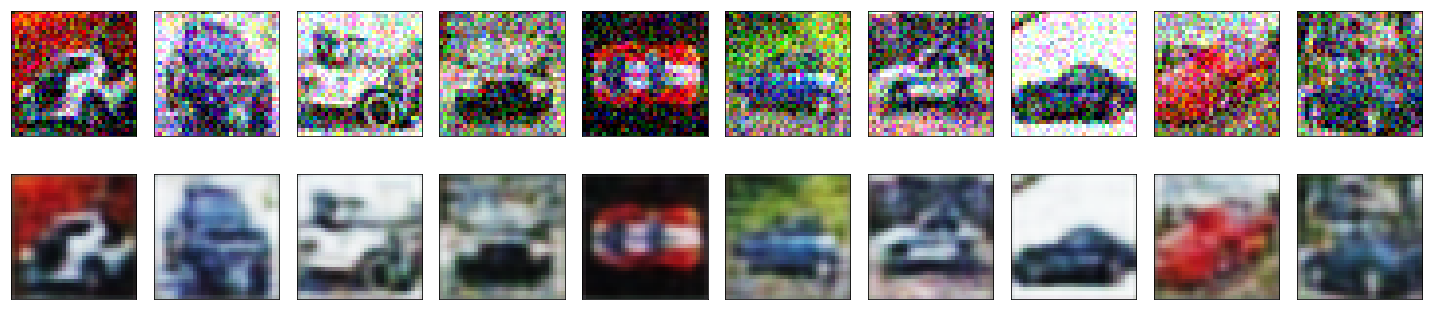

In [121]:
import matplotlib.pyplot as plt
% matplotlib inline

n_imgs = 10
f,axarr = plt.subplots(2,n_imgs,figsize=[20,5])
decoded_imgs = autoencoder.predict(x_test_n)

for i in range(n_imgs):
    
    ax = axarr[0,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(x_test_n[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = axarr[1,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(decoded_imgs[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
            
plt.tight_layout()
plt.show()

### Load trained model

In [127]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train[np.where(y_train==1)[0],:,:,:]
x_test = x_test[np.where(y_test==1)[0],:,:,:]

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train_n = x_train + 0.5 *\
 np.random.normal(loc=0.0, scale=0.4, size=x_train.shape) 

x_test_n = x_test + 0.5 *\
 np.random.normal(loc=0.0, scale=0.4, size=x_test.shape) 

x_train_n = np.clip(x_train_n, 0., 1.)
x_test_n = np.clip(x_test_n, 0., 1.)

In [128]:
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.datasets import cifar10
import numpy as np

inp_img = Input(shape=(32, 32, 3)) 
img= Conv2D(32, (3, 3), activation='relu', padding='same')(inp_img)
img = MaxPooling2D((2, 2), padding='same')(img)
img = Conv2D(32, (3, 3), activation='relu', padding='same')(img)
img = UpSampling2D((2, 2))(img)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(img)

autoencoder = Model(inp_img, decoded)
Model.load_weights(autoencoder,'./models/autoencoder/autoencoder_model')

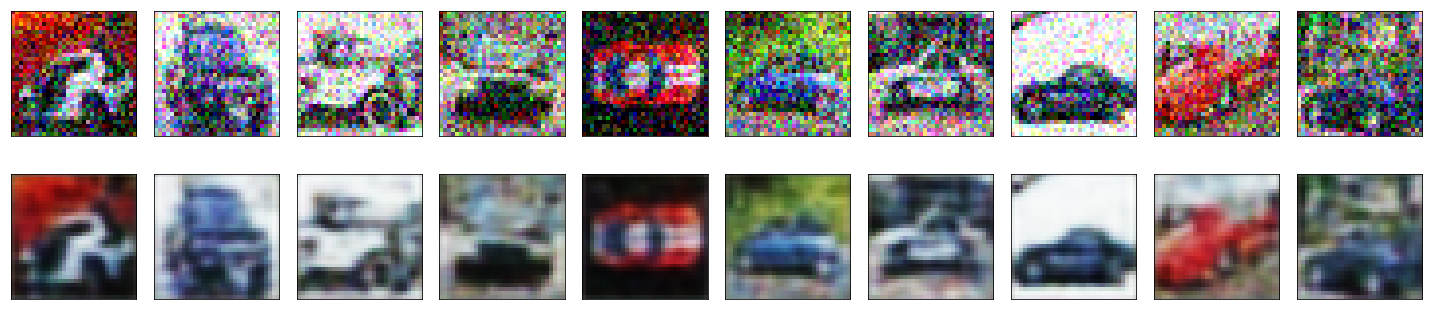

In [129]:
import matplotlib.pyplot as plt
% matplotlib inline

n_imgs = 10
f,axarr = plt.subplots(2,n_imgs,figsize=[20,5])
decoded_imgs = autoencoder.predict(x_test_n)

for i in range(n_imgs):
    
    ax = axarr[0,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(x_test_n[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = axarr[1,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(decoded_imgs[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
            
plt.tight_layout()
plt.show()

### TF-Slim - Pretrained VGG16

In [171]:
tf.reset_default_graph()

In [175]:
from tensorflow.contrib import slim
sys.path.append("/Users/OG/Desktop/Study/jupyter/learning-tensorflow/Oreilly-Learning-TensorFlow-master/07__abstractions/pretrained/models/research/slim")


import sys
from datasets import dataset_utils
import tensorflow as tf
# import urllib2
# https://stackoverflow.com/questions/2792650/import-error-no-module-name-urllib2
from urllib.request import urlopen
from nets import vgg
from preprocessing import vgg_preprocessing
import os

target_dir = '.'

url = ("http://localhost:8888/view/learning-tensorflow/Oreilly-Learning-TensorFlow-master/07__abstractions/car.jpg")

im_as_string = urlopen(url).read()  
print(type(im_as_string))
im = tf.image.decode_jpeg(im_as_string, channels=3)

image_size = vgg.vgg_16.default_image_size

processed_im = vgg_preprocessing.preprocess_image(im,
                                                         image_size,
                                                         image_size,
                                                         is_training=False)

processed_images = tf.expand_dims(processed_im, 0)

<class 'bytes'>


In [176]:
im

<tf.Tensor 'DecodeJpeg_1:0' shape=(?, ?, 3) dtype=uint8>

In [173]:
with slim.arg_scope(vgg.vgg_arg_scope()):
    logits, _ = vgg.vgg_16(processed_images,
                            num_classes=1000,
                             is_training=False)
    
probabilities = tf.nn.softmax(logits)

def vgg_arg_scope(weight_decay=0.0005):
    with slim.arg_scope([slim.conv2d, slim.fully_connected],
                     activation_fn=tf.nn.relu,
                     weights_regularizer=slim.l2_regularizer(weight_decay),
                     biases_initializer=tf.zeros_initializer):
        with slim.arg_scope([slim.conv2d], padding='SAME') as arg_sc:
            return arg_sc



load_vars = slim.assign_from_checkpoint_fn(
     os.path.join(target_dir, 'vgg_16.ckpt'),
     slim.get_model_variables('vgg_16'))


from datasets import imagenet
imagenet.create_readable_names_for_imagenet_labels()

{0: 'background',
 1: 'tench, Tinca tinca',
 2: 'goldfish, Carassius auratus',
 3: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 4: 'tiger shark, Galeocerdo cuvieri',
 5: 'hammerhead, hammerhead shark',
 6: 'electric ray, crampfish, numbfish, torpedo',
 7: 'stingray',
 8: 'cock',
 9: 'hen',
 10: 'ostrich, Struthio camelus',
 11: 'brambling, Fringilla montifringilla',
 12: 'goldfinch, Carduelis carduelis',
 13: 'house finch, linnet, Carpodacus mexicanus',
 14: 'junco, snowbird',
 15: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 16: 'robin, American robin, Turdus migratorius',
 17: 'bulbul',
 18: 'jay',
 19: 'magpie',
 20: 'chickadee',
 21: 'water ouzel, dipper',
 22: 'kite',
 23: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 24: 'vulture',
 25: 'great grey owl, great gray owl, Strix nebulosa',
 26: 'European fire salamander, Salamandra salamandra',
 27: 'common newt, Triturus vulgaris',
 28: 'eft',
 29: 'spotted sal

### Infer class and probability

In [174]:
names = []
with tf.Session() as sess:
    load_vars(sess)     
    network_input, probabilities = sess.run([processed_images,
                                             probabilities])
    probabilities = probabilities[0, 0:]
    names_ = imagenet.create_readable_names_for_imagenet_labels()
    idxs = np.argsort(-probabilities)[:5]
    probs = probabilities[idxs]
    classes = np.array(names_.values())[idxs+1]
    for c,p in zip(classes,probs):
        print('Class: '+ c + ' |Prob: ' + str(p))

INFO:tensorflow:Restoring parameters from ./vgg_16.ckpt


InvalidArgumentError: Expected image (JPEG, PNG, or GIF), got unknown format starting with '<!DOCTYPE HTML>\n'
	 [[Node: DecodeJpeg = DecodeJpeg[acceptable_fraction=1, channels=3, dct_method="", fancy_upscaling=true, ratio=1, try_recover_truncated=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](DecodeJpeg/contents)]]

Caused by op 'DecodeJpeg', defined at:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/anaconda3/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-172-1beaadec2061>", line 20, in <module>
    im = tf.image.decode_jpeg(im_as_string, channels=3)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tensorflow/python/ops/gen_image_ops.py", line 948, in decode_jpeg
    name=name)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Expected image (JPEG, PNG, or GIF), got unknown format starting with '<!DOCTYPE HTML>\n'
	 [[Node: DecodeJpeg = DecodeJpeg[acceptable_fraction=1, channels=3, dct_method="", fancy_upscaling=true, ratio=1, try_recover_truncated=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](DecodeJpeg/contents)]]
